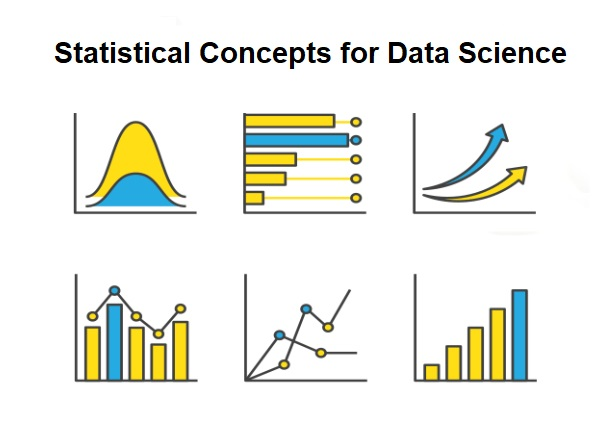

In [1]:
from IPython.display import Image
Image(r"C:\Users\mm388\OneDrive\Desktop\Statistical Concepts for Data Science.jpg")

# Measures of Central Tendency

# Mean,Median,Mode

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# MEan
df[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [8]:
## Median
df[['Age','Annual Income (k$)','Spending Score (1-100)']].median()

Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

In [9]:
## Mode
import statistics as st
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    print('mode of ',i,'is-->',st.mode(df[i]))


mode of  Age is--> 32
mode of  Annual Income (k$) is--> 54
mode of  Spending Score (1-100) is--> 42


# Outlier Detection and Removal

In [11]:
df = pd.read_csv('mtcars.csv')

In [12]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [13]:
import seaborn as sns

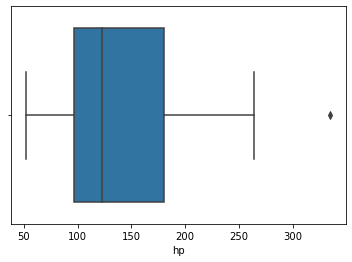

In [14]:
sns.boxplot(data = df,x = df.hp)

In [15]:
df.hp.describe()

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: hp, dtype: float64

In [16]:
first_quantile = df.hp.quantile(0.25)
third_quantile = df.hp.quantile(0.75)



In [17]:
# Inter Quantile Range(iqr) is = third_quantile - first_quantile
iqr = third_quantile - first_quantile

In [18]:
# The data less than (first_quantile - 1.5*iqr) and greater than (third_quantile + 1.5*iqr) is
# considered as outlier

In [19]:
lower_bound = (first_quantile - 1.5*iqr)
upper_bound = (third_quantile + 1.5*iqr)


In [20]:
high_outliers = df.hp>upper_bound

In [21]:
df[high_outliers]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [22]:
# Clearly there is one high outlier
# lets impute the outlier with mean or median
df.iloc[30,4] = df.hp.mean()

In [23]:
low_outliers = df.hp<lower_bound
df[low_outliers]
#No Outliers

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


# Skewness

In [24]:
dictionary = {
    'Name':['Mahesh','Rakesh','Ramu','Bharat','Vin','jan','Tarak','Arjun','Srinu','Prabhas','Satya','Vijay'],
    'Age':[25,26,25,23,30,29,23,34,40,30,51,46],
    'Rating':[4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65]
}

In [25]:
df = pd.DataFrame(dictionary)

In [26]:
df

,Name,Age,Rating
0,Mahesh,25,4.23
1,Rakesh,26,3.24
2,Ramu,25,3.98
3,Bharat,23,2.56
4,Vin,30,3.20
5,jan,29,4.60
6,Tarak,23,3.80
7,Arjun,34,3.78
8,Srinu,40,2.98
9,Prabhas,30,4.80


skewness = Mean - Median
if skewness<0 then it is called left skewness.
if skewness is >0 then it is called right skewness

In [27]:
df.skew()


Age       1.135089
Rating   -0.153629
dtype: float64

whenever the skewness is zero.The graph is perfect bell shape curve or 
we can say we cannot have outliers

In Above dataset Age has right skewness and Rating has left skewness

# Frequency tables and Histograms

In [28]:
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('blood_pressure.csv',usecols=['patient','sex','agegrp','bp_before','bp_after'])

In [30]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [31]:
#printing Frequency table
df.sex.value_counts()

Male      60
Female    60
Name: sex, dtype: int64

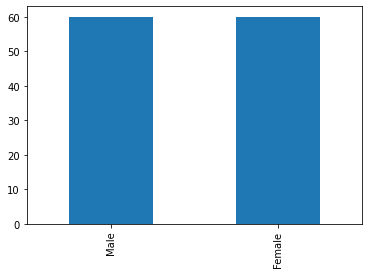

In [32]:
#Visualizing
df.sex.value_counts().plot(kind='bar')

Text(0.5, 0, 'bp_before')

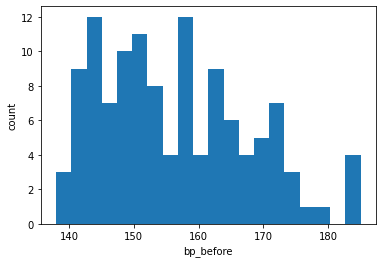

In [33]:
#Histogram
plt.hist(df.bp_before,bins=20)
plt.ylabel('count')
plt.xlabel('bp_before')

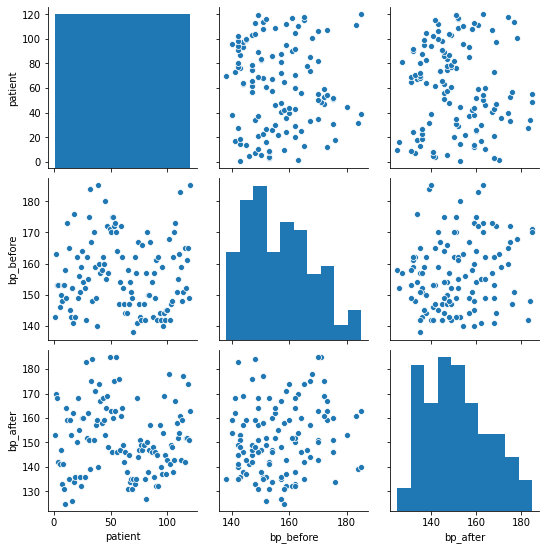

In [34]:
#Multivariate Analysis
sns.pairplot(df)

# Covariance and Corelelation

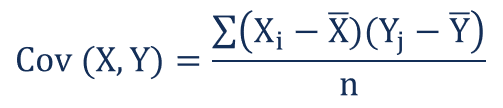

In [35]:
from IPython.display import Image
Image(r"C:\Users\KRISHNA VAMSI NADH\Downloads\covariance1.png")


Where:

Xi – the values of the X-variable
Yj – the values of the Y-variable
X̄ – the mean (average) of the X-variable
Ȳ – the mean (average) of the Y-variable
n – the number of data points


Positive covariance: Indicates that two variables tend to move in the same direction.
Negative covariance: Reveals that two variables tend to move in inverse directions

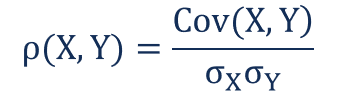

In [36]:
from IPython.display import Image
Image(r"C:\Users\KRISHNA VAMSI NADH\Downloads\covariance3.png")


Where:

ρ(X,Y) – the correlation between the variables X and Y
Cov(X,Y) – the covariance between the variables X and Y
σX – the standard deviation of the X-variable
σY – the standard deviation of the Y-variable
 
    
Corelation varies between -1 and +1
if Corelation is close to +1 or -1 then they are highly corelated
if Corelation is close to 0 then they are weakly corelated or sometimes no corelation



In [37]:
df = pd.read_csv('iris.csv',usecols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In the above result PetalLengthCm and SepalLengthCm,petal are highly corelated we can drop any one of these 
columns since they are doing same job
we can visualize above results using pairplot

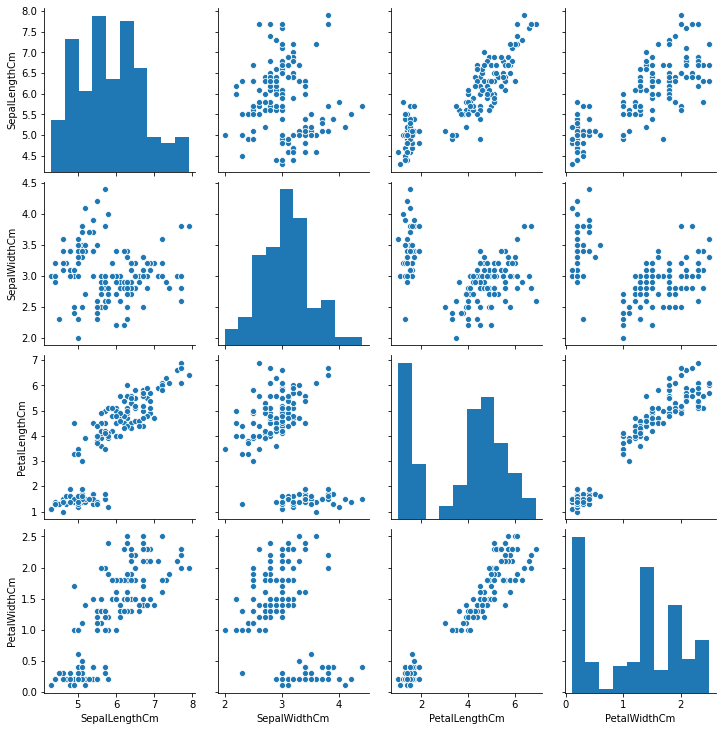

In [40]:

sns.pairplot(df)

In [41]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


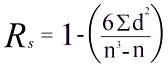

In [42]:
# Spearman's Rank Correlation Coefficient
Image(r"C:\Users\KRISHNA VAMSI NADH\Downloads\covariance4.jpg")


where d is the difference between the rank of each data point of two variables
   reference -->https://geographyfieldwork.com/SpearmansRank.htm

In [43]:
df.corr(method='spearman')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


# Distribution
A Distribution is a function that shows possible values for a variable and how often they occur

###### Bionomial Distribution

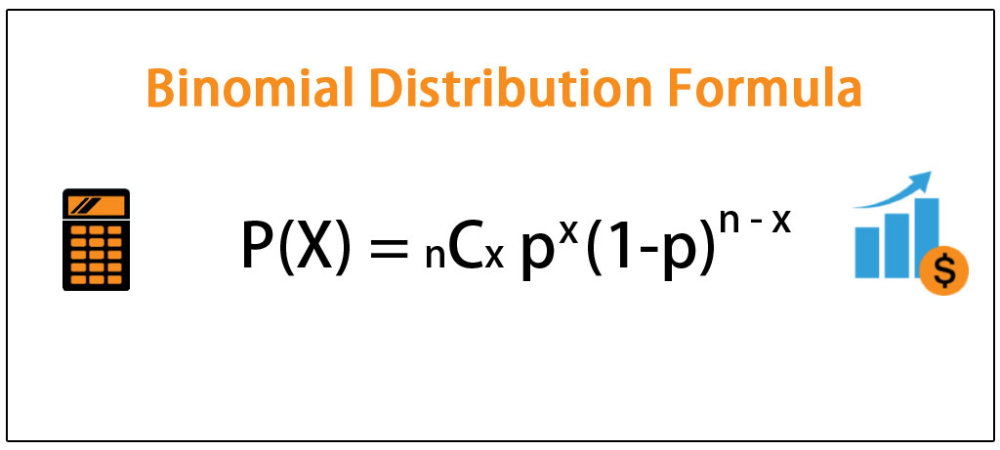

In [44]:
Image(r"C:\Users\KRISHNA VAMSI NADH\Downloads\bid.png")
# p is probability of success

In [45]:

from scipy.stats import binom

Example:
Consider a cricket  series of 5 matches,the team will win the series when it win atleast 3 matches.we need to find the probability of winnig series given probability of winning a match is 0.75

In [46]:
# By applying above formula we have k=3,4,5,n=5,p=0.75
prob_of_winning_series = binom.pmf(k=3,n=5,p=0.75)+binom.pmf(k=4,n=5,p=0.75)+binom.pmf(k=5,n=5,p=0.75)

print(f'probability of winning series is:{prob_of_winning_series}')

probability of winning series is:0.896484375


Probability is greater than 0.5 ,hence team will win the series

##### Poission Distribution
It is used when we have count like situation

Example:How many eggs will the chicken make



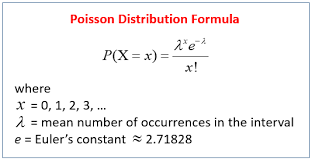

In [47]:
Image(r"C:\Users\KRISHNA VAMSI NADH\Downloads\pdf.png")


Problem: A real estate company is selling 2 homes per day then what is probability that company will sell 3 homes per day
    

In [48]:
from scipy.stats import poisson

In [49]:
poisson.pmf(3,2)

0.18044704431548356

There is 18% chance that company will sell 3 homes per day

##### Normal Distribution

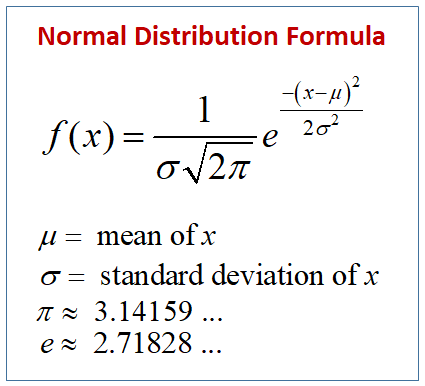

In [50]:
Image(r"C:\Users\KRISHNA VAMSI NADH\Downloads\nd.png")


68% of data lies between (mean-1std,mean+1std)

95% of data lies between (mean-2std,mean+2std)

99.7% of data lies between (mean-3std,mean+3std)


In [51]:
import numpy as np

In [52]:
data = np.random.normal(5,2,1000)

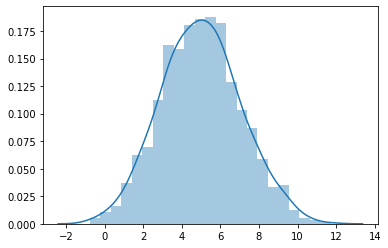

In [53]:
sns.distplot(data)

In [54]:
df = pd.read_csv('blood_pressure.csv',usecols=['patient','sex','agegrp','bp_before','bp_after'])

###### Standardization

We perform standardization to bring down values to a same scale So that all

the patterns will be learnt smoothly

Formula:(X-mean/standard_deviation)

In [55]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit_transform(df[['bp_before','bp_after']])

array([[-1.18582775,  0.11627831],
       [ 0.57748489,  1.32037861],
       [-0.30417143,  1.17871975],
       [-0.30417143, -0.66284541],
       [-0.92133085, -0.73367484],
       [-0.56866833, -0.30869826],
       [-0.74499959, -1.30031027],
       [-0.30417143, -0.73367484],
       [-0.30417143, -1.44196913],
       [ 0.13665673, -1.86694571],
       [-0.65683396,  0.89540203],
       [ 1.45914121,  0.54125489],
       [ 0.75381615, -1.15865141],
       [-1.00949649,  0.54125489],
       [-1.18582775,  0.11627831],
       [-0.39233706, -1.79611628],
       [-1.36215901,  0.75374318],
       [ 1.7236381 , -1.22948084],
       [-1.18582775, -1.08782198],
       [ 0.48931926, -0.09620997],
       [-0.65683396,  1.17871975],
       [-0.03967453,  0.25793717],
       [-0.48050269, -1.08782198],
       [ 0.22482236, -1.3711397 ],
       [ 0.66565052,  0.61208432],
       [-0.2160058 ,  0.61208432],
       [-0.39233706, -1.08782198],
       [-1.27399338,  2.24116119],
       [ 0.48931926,

In [56]:
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


###### Log Normal Distribution
If log(X) follows Normal Distribution then X follows Log Normal Distribution

In [57]:
from scipy.stats import skewnorm
x = skewnorm.rvs(6,size=10000)


In [58]:
x

array([ 0.16948498,  0.93009519, -0.0906735 , ...,  0.89992715,
        0.43342922,  2.36368596])

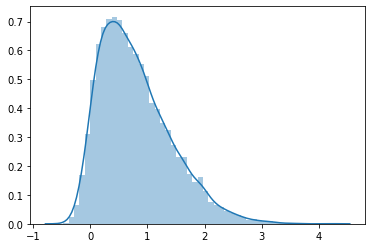

In [59]:
sns.distplot(x)

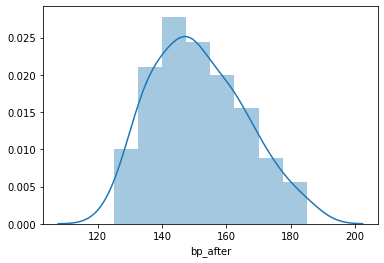

In [60]:
sns.distplot(df.bp_after)